# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import sys

import mplsoccer
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
import matplotlib.patheffects as path_effects

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load the data

In [2]:
eventsDataLaLiga2019 = pd.read_csv("D:\Analytics\Football\MAS - Masterclass\Data\matchwise_events_data_updated.csv", low_memory=False)

In [3]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)

# Data Prep

In [4]:
eventsDataLaLiga2019.columns[eventsDataLaLiga2019.columns.str.contains('pressure')]

Index(['under_pressure'], dtype='object')

In [5]:
eventsDataLaLiga2019[['type.id','type.name']].drop_duplicates()

type.id          type.name
0           35        Starting XI
2           18         Half Start
4           30               Pass
5           42      Ball Receipt*
8           43              Carry
39          17           Pressure
42          14            Dribble
43           4               Duel
87          22     Foul Committed
88          21           Foul Won
108         39      Dribbled Past
113          2      Ball Recovery
117          3       Dispossessed
167         38         Miscontrol
181         16               Shot
182         23        Goal Keeper
183          9          Clearance
192          6              Block
427         10       Interception
1143        40    Injury Stoppage
1932        34           Half End
1936        19       Substitution
1988        36     Tactical Shift
1991        27         Player Off
2181        26          Player On
3642        41  Referee Ball-Drop
4239        33              50/50
9744        28             Shield
11345       24      Bad Behaviour
12156       37              Error
23814        8            Offside
35430       20   Own Goal Against
35431       25       Own Goal For

In [6]:
eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==17]

match_id                                    id  index  period  \
39        303421  d9d8c4bc-4837-4034-aafa-fea9ff4841b6     40       1   
86        303421  5196d180-5085-43f6-9160-fd31b86d8ac3     87       1   
96        303421  b5af56dd-bf65-424b-be5b-0817093c44ae     97       1   
97        303421  d0eb38bd-0f90-490d-9800-98bf0915c0ea     98       1   
103       303421  cf2e00a7-e84b-43e1-9478-3e9a8ec6f88c    104       1   
...          ...                                   ...    ...     ...   
128964    303731  9c9e428f-ecc1-4db5-8e41-60b7884243b2   3596       2   
128972    303731  4539bd8d-008e-482f-a14a-7133545d53b6   3604       2   
128984    303731  fdc3a949-4a1e-42c0-92d5-24f182c0d2a4   3616       2   
129025    303731  48682194-1ffd-477e-8715-9fa05e6bd201   3657       2   
129033    303731  d346a0d4-d7e2-4c68-8248-67e0c7f962f6   3665       2   

       timestamp  minute  second  possession  duration  type.id type.name  \
39       00:39.6       0      39           2  0.612580       17  Pressure   
86       01:13.0       1      12           2  0.989270       17  Pressure   
96       01:44.4       1      44           3  0.326289       17  Pressure   
97       01:44.5       1      44           3  0.700558       17  Pressure   
103      01:45.9       1      45           3  0.768628       17  Pressure   
...          ...     ...     ...         ...       ...      ...       ...   
128964   45:25.9      90      25         184  1.508156       17  Pressure   
128972   45:36.0      90      36         184  0.661125       17  Pressure   
128984   45:41.8      90      41         184  1.343947       17  Pressure   
129025   46:33.7      91      33         184  0.745519       17  Pressure   
129033   46:42.6      91      42         184  0.413270       17  Pressure   

        possession_team.id possession_team.name  play_pattern.id  \
39                     217            Barcelona                9   
86                     217            Barcelona                9   
96                     217            Barcelona                3   
97                     217            Barcelona                3   
103                    217            Barcelona                3   
...                    ...                  ...              ...   
128964                 217            Barcelona                1   
128972                 217            Barcelona                1   
128984                 217            Barcelona                1   
129025                 217            Barcelona                1   
129033                 217            Barcelona                1   

       play_pattern.name  team.id         team.name  tactics.formation  \
39         From Kick Off      206  Deportivo Alavés                NaN   
86         From Kick Off      206  Deportivo Alavés                NaN   
96        From Free Kick      206  Deportivo Alavés                NaN   
97        From Free Kick      206  Deportivo Alavés                NaN   
103       From Free Kick      206  Deportivo Alavés                NaN   
...                  ...      ...               ...                ...   
128964      Regular Play      322             Eibar                NaN   
128972      Regular Play      322             Eibar                NaN   
128984      Regular Play      322             Eibar                NaN   
129025      Regular Play      322             Eibar                NaN   
129033      Regular Play      322             Eibar                NaN   

       tactics.lineup                                     related_events  \
39                NaN                                                NaN   
86                NaN           ['7767af25-be00-4696-ba63-d7d14f5f171a']   
96                NaN  ['2d7bf141-e683-4d49-aa7a-efd756b5d559', 'd382...   
97                NaN  ['2d7bf141-e683-4d49-aa7a-efd756b5d559', 'd382...   
103               NaN  ['bc28474b-89ab-44d3-90d6-93b3becda7ae', 'bc86...   
...               ...                       

Separating the X and Y coordinates for Pressure Locations

In [7]:
eventsDataLaLiga2019['startX'] = eventsDataLaLiga2019['location'].str.split(', ', expand=True)[0].str[1:].apply(pd.to_numeric)
eventsDataLaLiga2019['startY'] = eventsDataLaLiga2019['location'].str.split(', ', expand=True)[1].str[:-1].apply(pd.to_numeric)

In [8]:
pressData = deepcopy(eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==17])

# Generating Pressure Maps

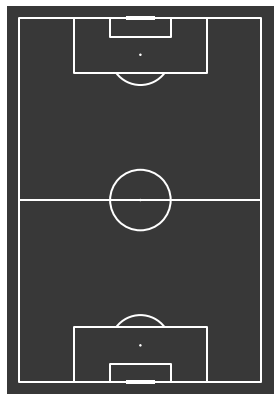

In [9]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

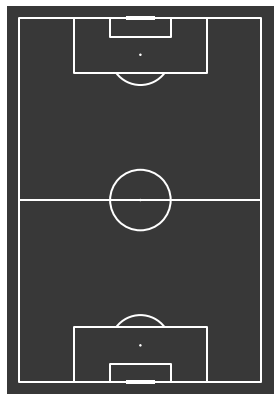

In [10]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='vertical',
                                               normalize=True)

In [11]:
bin_statistic

[{'statistic': array([[0.07556722, 0.22988937, 0.25379711, 0.22782674, 0.15310332,
          0.05981624]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [80., 80., 80., 80., 80., 80., 80.]]),
  'cx': array([[  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]]),
  'cy': array([[40., 40., 40., 40., 40., 40.]])}]

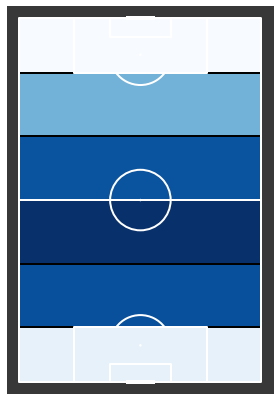

In [12]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='vertical',
                                               normalize=True)
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='Blues',
                         edgecolor='black')

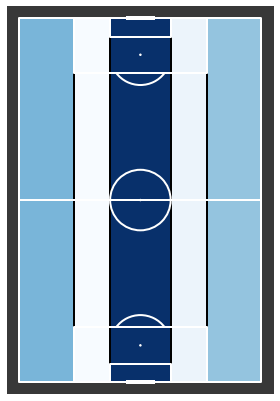

In [13]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='horizontal',
                                               normalize=True)
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='Blues',
                         edgecolor='black')

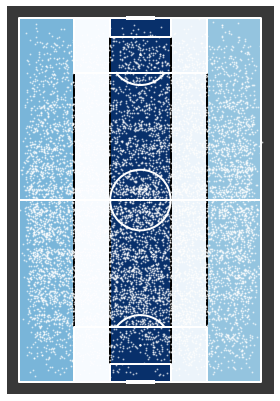

In [14]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='horizontal',
                                               normalize=True)
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='Blues',
                         edgecolor='black')
pitch.scatter(pressData['startX'],pressData['startY'],
              c='white',s=1, ax=ax, alpha=0.5)

In [15]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()] # Gives outline to the text

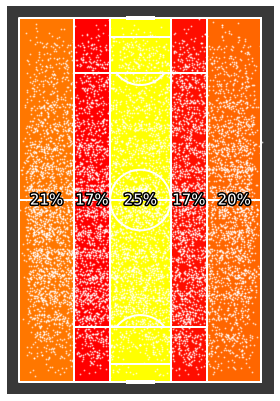

In [16]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='horizontal',
                                               normalize=True)
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='autumn',
                         edgecolor='white')

pitch.scatter(pressData['startX'],pressData['startY'],
              c='white',s=1, ax=ax, alpha=0.5)

labels = pitch.label_heatmap(bin_statistic,color='white',fontsize=15,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}',path_effects=path_eff)

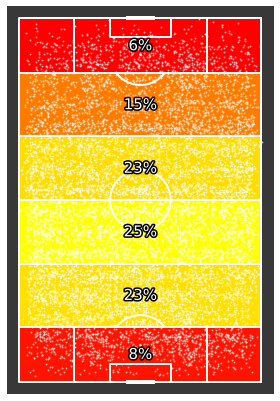

In [61]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838',line_zorder=2,line_color='white')
fig, ax = pitch.draw(figsize=(4,6))

'''
Here we use the pitch.bin_statistic_position function,
which calculates the binned statistics after dividing the pitch in JdP zones 
'''

bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                               statistic='count',
                                               positional='vertical',
                                               normalize=True)
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='autumn',
                         edgecolor='white')

pitch.scatter(pressData['startX'],pressData['startY'],
              c='white',s=1, ax=ax, alpha=0.5)

labels = pitch.label_heatmap(bin_statistic,color='white',fontsize=15,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}',path_effects=path_eff)

## Distribution in all Positional Sections

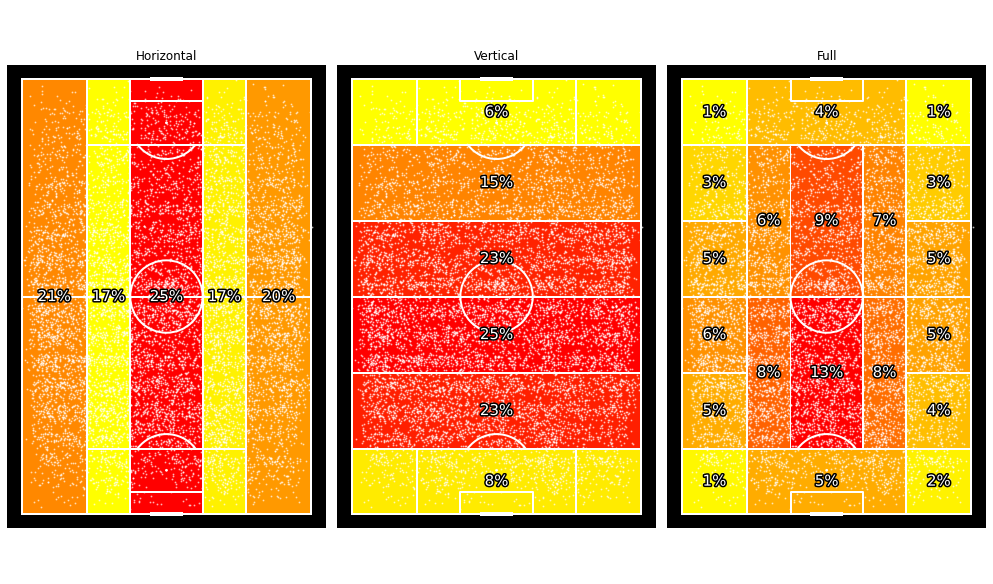

In [18]:
'''
Distribution of pressure on the pitch map
(Horizontal, Vertical and Full)
'''

pitch = mplsoccer.VerticalPitch(pitch_color='black',line_zorder=2,line_color='white')

fig,axs = pitch.grid(nrows=1, ncols=3, title_height=.08, axis=False)

pitchPos = ['horizontal','vertical','full']
for idx,ax in enumerate(axs['pitch']):
    pos = pitchPos[idx]
    bin_statistic = pitch.bin_statistic_positional(x=pressData['startX'],y=pressData['startY'],
                                                   statistic='count',
                                                   positional=pos,
                                                   normalize=True)
    pitch.heatmap_positional(bin_statistic,
                             ax=ax,
                             cmap='autumn_r',
                             edgecolor='white')

    pitch.scatter(pressData['startX'],pressData['startY'],
                  c='white',s=1, ax=ax, alpha=0.5)

    labels = pitch.label_heatmap(bin_statistic,color='white',fontsize=15,
                                 ax=ax, ha='center', va='center',
                                 str_format='{:.0%}',path_effects=path_eff)
    ax.set_title(pos.capitalize())

## Pressure Hex Maps

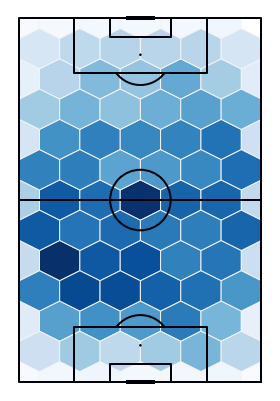

In [19]:
pitch = mplsoccer.VerticalPitch(line_color='#000009',pitch_color='white',line_zorder=2)
fig, ax = pitch.draw(figsize=(4,6))

hexmap = pitch.hexbin(pressData['startX'], pressData['startY'],
                      ax=ax, edgecolors='#f4f4f4',
                      gridsize=(6,6), cmap='Blues')

# Analysing Pressure Maps

## Team-wise

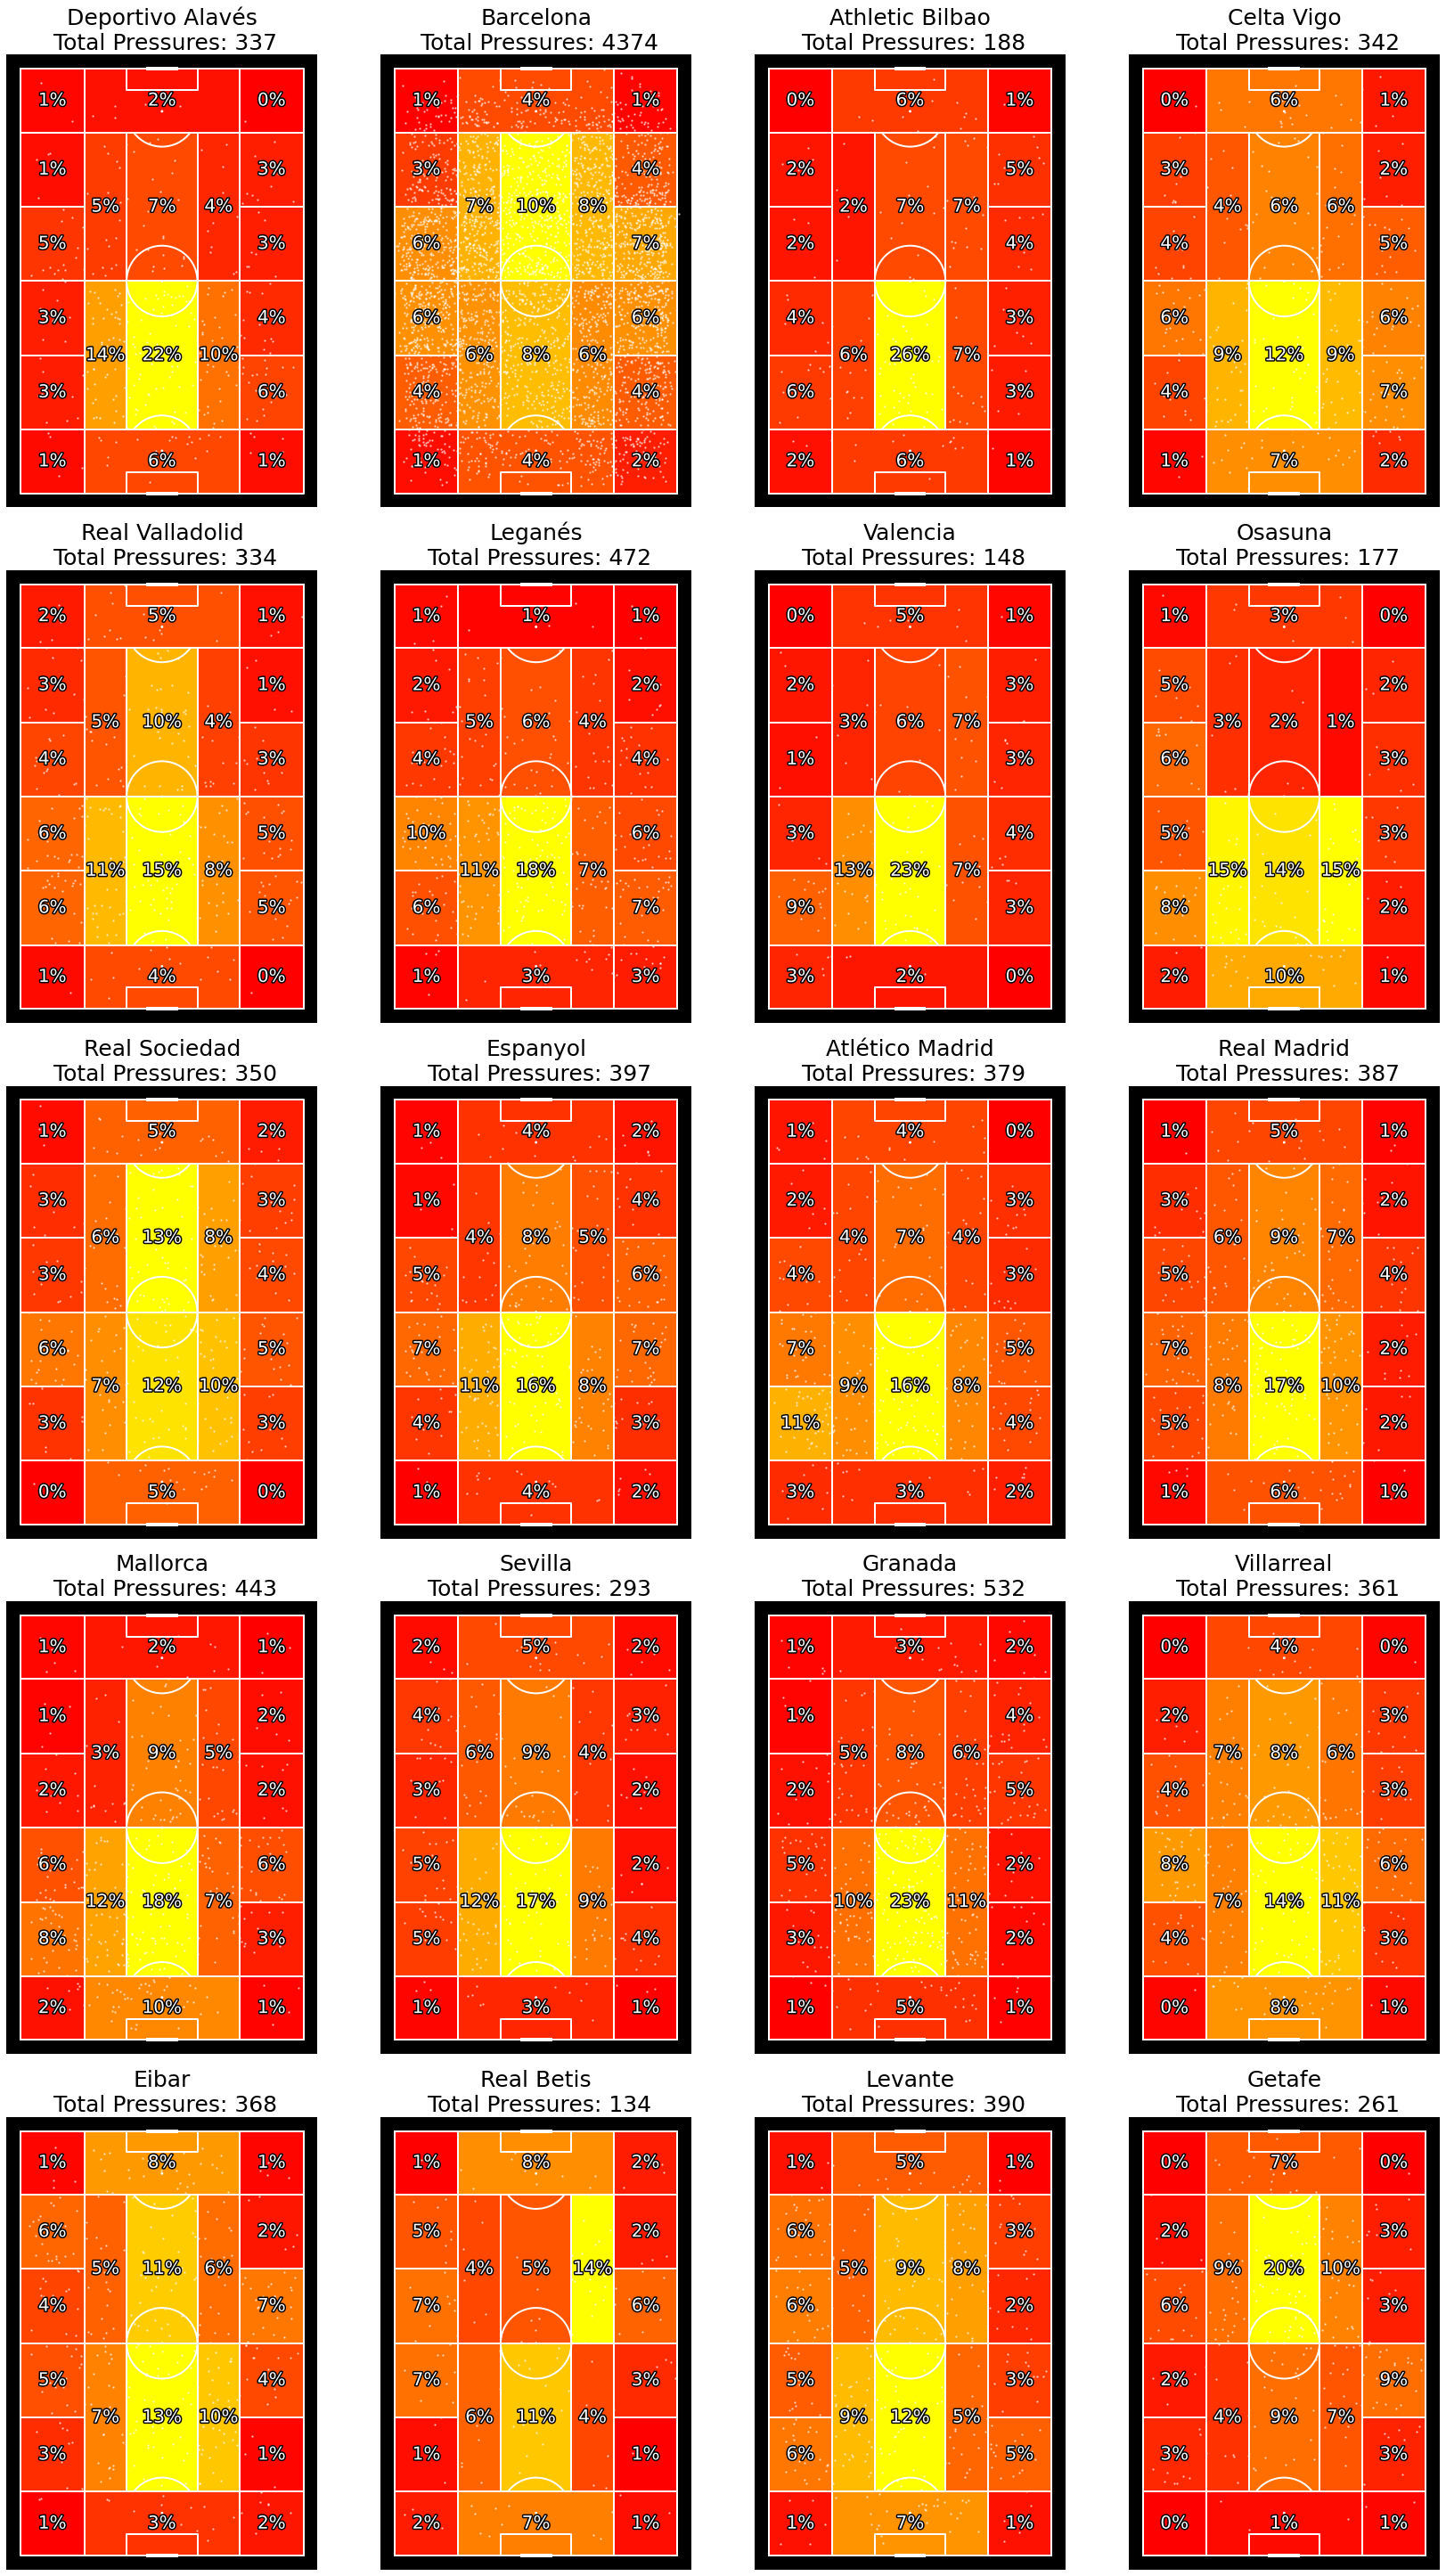

In [20]:
pitch = mplsoccer.VerticalPitch(pitch_color='black', line_color='white', line_zorder=2)
fig, axs = pitch.grid(nrows=5, ncols=4, axis=False,
                      figheight=40,
                      space=0.1, grid_height=0.98, grid_width=0.9,
                      title_height=0, endnote_height=0)

teamIDs = pressData['team.id'].unique()

for idx,ax in enumerate(axs['pitch'].flat):
    
    teamData = pressData[pressData['team.id']==teamIDs[idx]]
    
    bin_statistic = pitch.bin_statistic_positional(teamData['startX'],teamData['startY'],
                                                   statistic='count',
                                                   positional='full',
                                                   normalize=True)
    
    pitch.heatmap_positional(bin_statistic,
                             ax=ax,
                             cmap='autumn',
                             edgecolor='white')
    
    pitch.scatter(teamData['startX'],teamData['startY'], c='white', s=2, alpha=.5, ax=ax)
    
    labels = pitch.label_heatmap(bin_statistic, 
                                 color='white', fontsize=20,
                                 ax=ax, ha='center', va='center',
                                 str_format='{:.0%}', path_effects = path_eff)
    teamName = teamData['team.name'].unique().item()
    totPressures = len(teamData)
    ax.set_title(teamName + '\n Total Pressures: ' + str(totPressures), fontsize = 25)

## Player-wise

In [21]:
barcaPressData = pressData[pressData['team.id']==217]

In [22]:
barcaPressData['player.id'].nunique()

26

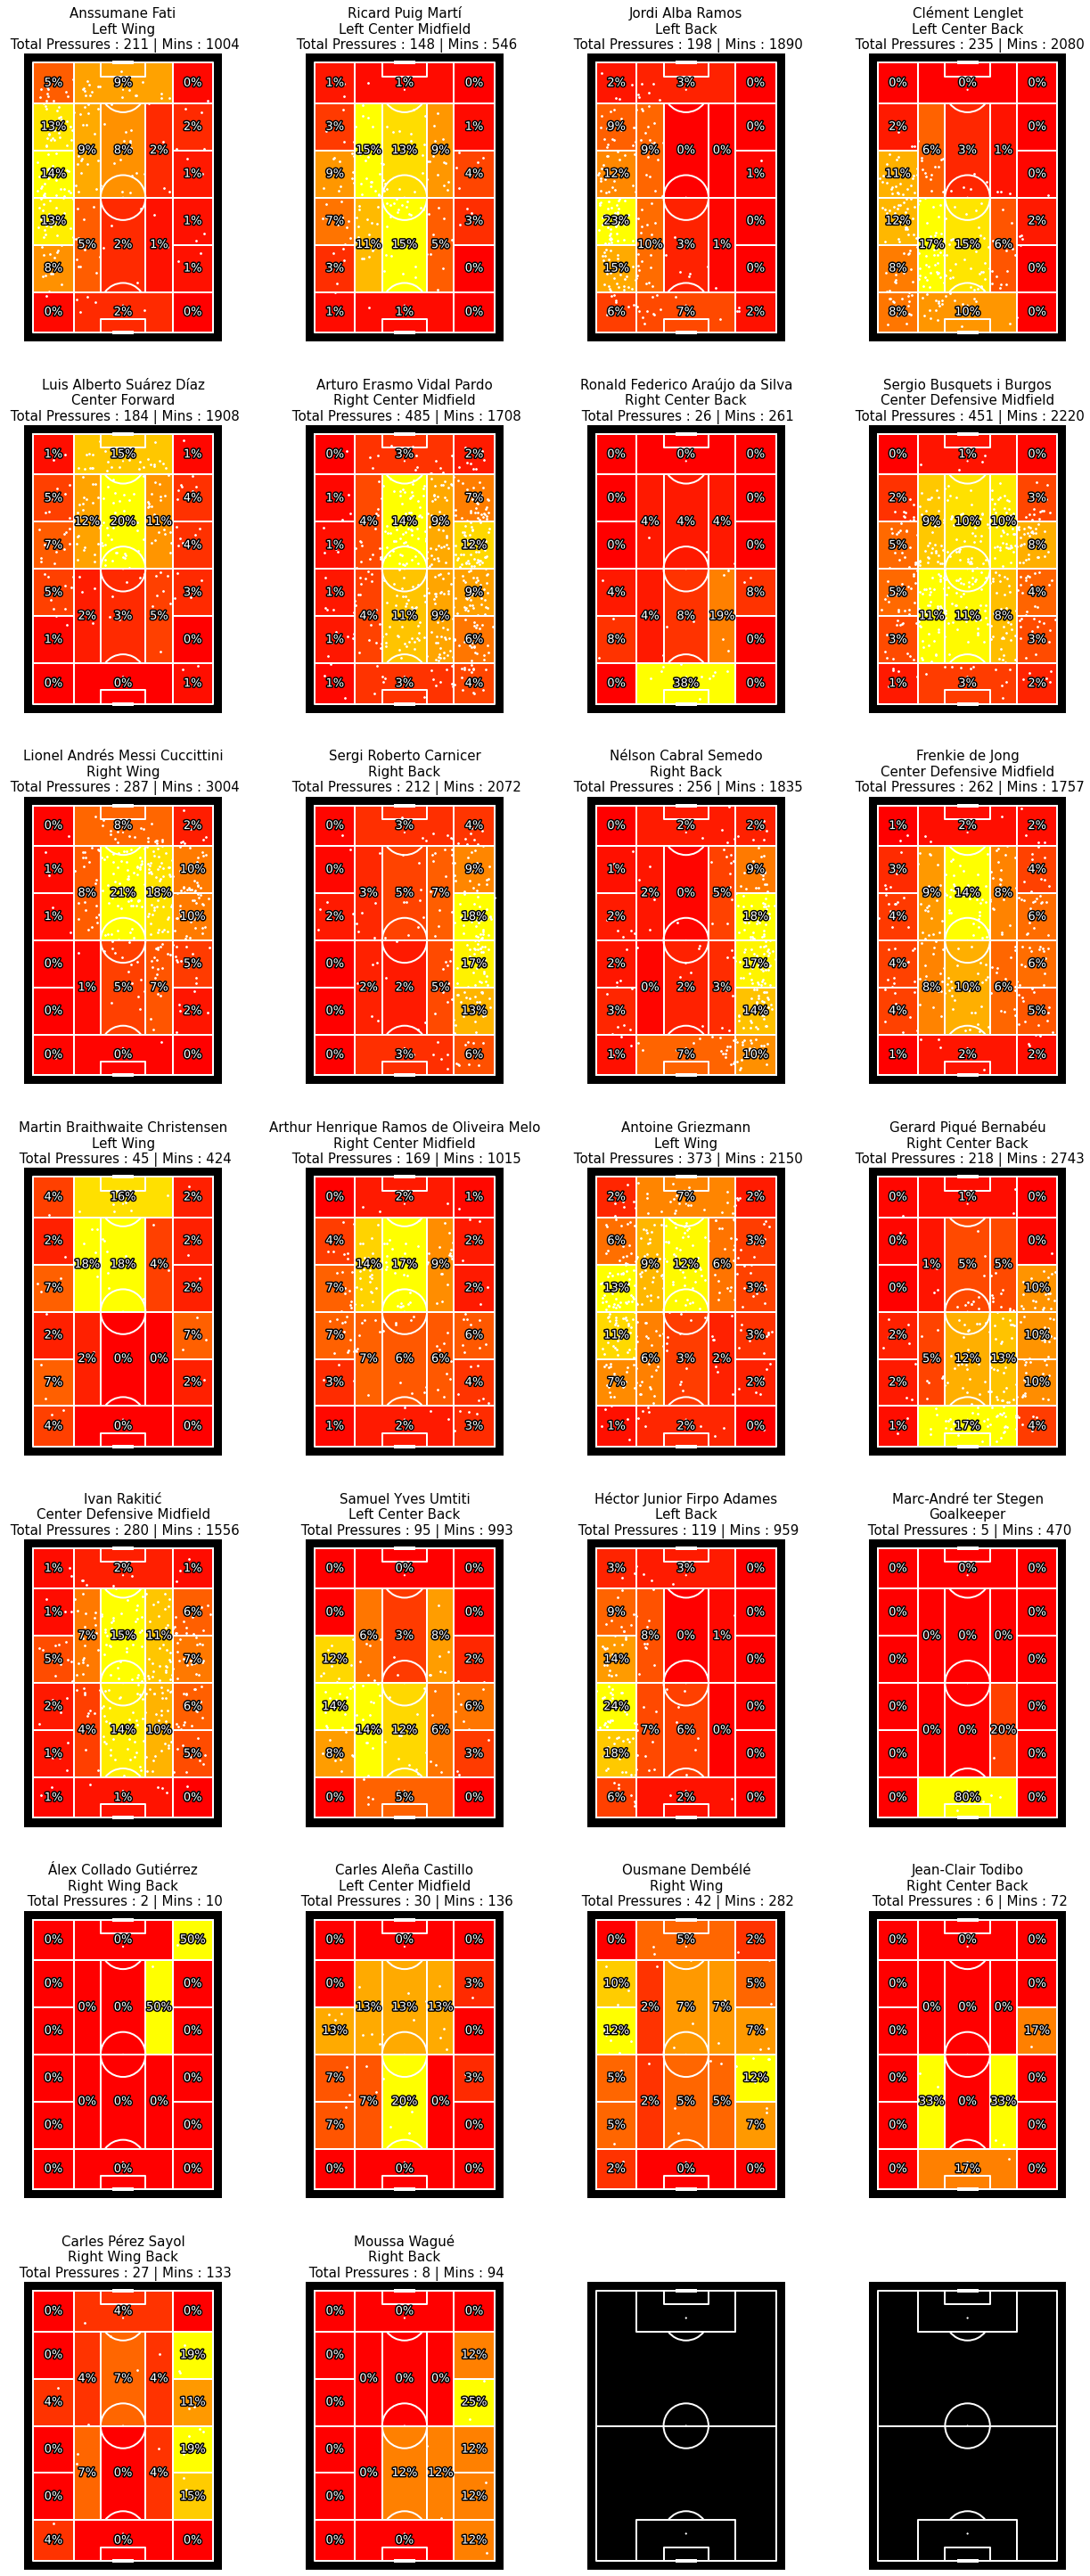

In [23]:
pitch = mplsoccer.VerticalPitch(pitch_color='black', line_color='white', line_zorder=2)
fig, axs = pitch.grid(nrows=7, ncols=4, axis=False,
                      figheight=40,
                      space=0.2, grid_height=0.98, grid_width=0.9,
                      title_height=0, endnote_height=0)

playerIDs = barcaPressData['player.id'].unique()

for idx,ax in enumerate(axs['pitch'].flat):
    if idx < len(playerIDs):
        playerData = barcaPressData[barcaPressData['player.id']==playerIDs[idx]]

        bin_statistic = pitch.bin_statistic_positional(playerData['startX'],playerData['startY'],
                                                       statistic='count',
                                                       positional='full',
                                                       normalize=True)

        pitch.heatmap_positional(bin_statistic,
                                 ax=ax,
                                 cmap='autumn',
                                 edgecolor='white')

        pitch.scatter(playerData['startX'],playerData['startY'], c='white', s=3, ax=ax)

        labels = pitch.label_heatmap(bin_statistic, 
                                     color='white', fontsize=13,
                                     ax=ax, ha='center', va='center',
                                     str_format='{:.0%}', path_effects = path_eff)
        playerName = playerData['player.name'].unique().item()
        position = playerData['position.name'].unique()[0]
        playerMins = playerData.dropna(subset=['minsPlayed'])\
                                            .drop_duplicates(subset=['match_id'])['minsPlayed'].sum().astype(int).item()
        totPressures = len(playerData)
        ax.set_title(playerName + '\n' + position +'\n Total Pressures : ' + str(totPressures) + ' | Mins : ' + str(playerMins), fontsize = 15)

## Match-wise (El Clasico)

In [24]:
elClasicoMatchIDs = [303596, 303470]

In [25]:
pressData[pressData['match_id'].isin(elClasicoMatchIDs)]

match_id                                    id  index  period  \
42837    303596  0ce247a9-e3f5-4f92-9f6e-4cce2605c5b3     32       1   
42839    303596  be0b5661-a511-4bdb-83c7-c47ca5a2ebaf     34       1   
42847    303596  2755109f-824c-47de-ae9b-174569b35adf     42       1   
42856    303596  2a27be57-1f44-45f4-988d-b42d9e804140     51       1   
42879    303596  b5ff1ac9-c68e-4a71-aedc-2d38a8a9e533     74       1   
...         ...                                   ...    ...     ...   
83470    303470  a31578e2-26a6-4467-885b-85c62f97bcf8   4188       2   
83480    303470  a6395789-7f08-49a2-a0ba-fec9970c0e9d   4198       2   
83489    303470  d270e0d9-d47e-429f-9de7-3af773882cc9   4207       2   
83495    303470  b1c8e082-5ff8-4e52-ad6a-240ba25c703b   4213       2   
83501    303470  fdb700e5-d4fd-4271-88a7-386aad583ef3   4219       2   

      timestamp  minute  second  possession  duration  type.id type.name  \
42837   00:17.4       0      17           2  0.867000       17  Pressure   
42839   00:22.0       0      21           2  1.997872       17  Pressure   
42847   00:40.3       0      40           3  1.189845       17  Pressure   
42856   01:18.3       1      18           5  0.278000       17  Pressure   
42879   01:44.6       1      44           6  0.240118       17  Pressure   
...         ...     ...     ...         ...       ...      ...       ...   
83470   44:32.8      89      32         193  2.304842       17  Pressure   
83480   45:34.4      90      34         196  0.511776       17  Pressure   
83489   46:06.9      91       6         197  0.639999       17  Pressure   
83495   46:32.7      91      32         198  0.826001       17  Pressure   
83501   46:37.1      91      37         198  1.083504       17  Pressure   

       possession_team.id possession_team.name  play_pattern.id  \
42837                 220          Real Madrid                9   
42839                 220          Real Madrid                9   
42847                 220          Real Madrid                4   
42856                 217            Barcelona                3   
42879                 217            Barcelona                4   
...                   ...                  ...              ...   
83470                 217            Barcelona                7   
83480                 217            Barcelona                1   
83489                 220          Real Madrid                4   
83495                 220          Real Madrid                4   
83501                 220          Real Madrid                4   

      play_pattern.name  team.id    team.name  tactics.formation  \
42837     From Kick Off      217    Barcelona                NaN   
42839     From Kick Off      220  Real Madrid                NaN   
42847     From Throw In      217    Barcelona                NaN   
42856    From Free Kick      220  Real Madrid                NaN   
42879     From Throw In      220  Real Madrid                NaN   
...                 ...      ...          ...                ...   
83470    From Goal Kick      220  Real Madrid                NaN   
83480      Regular Play      220  Real Madrid                NaN   
83489     From Throw In      220  Real Madrid                NaN   
83495     From Throw In      217    Barcelona                NaN   
83501     From Throw In      217    Barcelona                NaN   

      tactics.lineup                                     related_events  \
42837            NaN  ['24fc6405-9381-4db6-bf34-77f4cbe9a24a', 'a8aa...   
42839            NaN           ['02b1dae7-f043-459f-9008-969e8f7bfbbc']   
42847            NaN           ['00d3ef56-aeaa-4197-818b-c1e6c673962d']   
42856            NaN  ['009681bc-2451-44e4-950c-1ea518c7f74f', '0dd4...   
42879            NaN  ['3023fe33-9e6a-42e2-9d38-52590e881c46', 'd217...   
...              ...                                                ...   
83470            NaN           ['b4f0ea0f-967e-4996-9f52-0a296042c9a6']   
83480  

In [26]:
ecPressData = deepcopy(pressData[pressData['match_id'].isin(elClasicoMatchIDs)] )

In [27]:
matchIDs = ecPressData[['match_id','team.id']].drop_duplicates()['match_id'].to_list()
teamIDs = ecPressData[['match_id','team.id']].drop_duplicates()['team.id'].to_list()

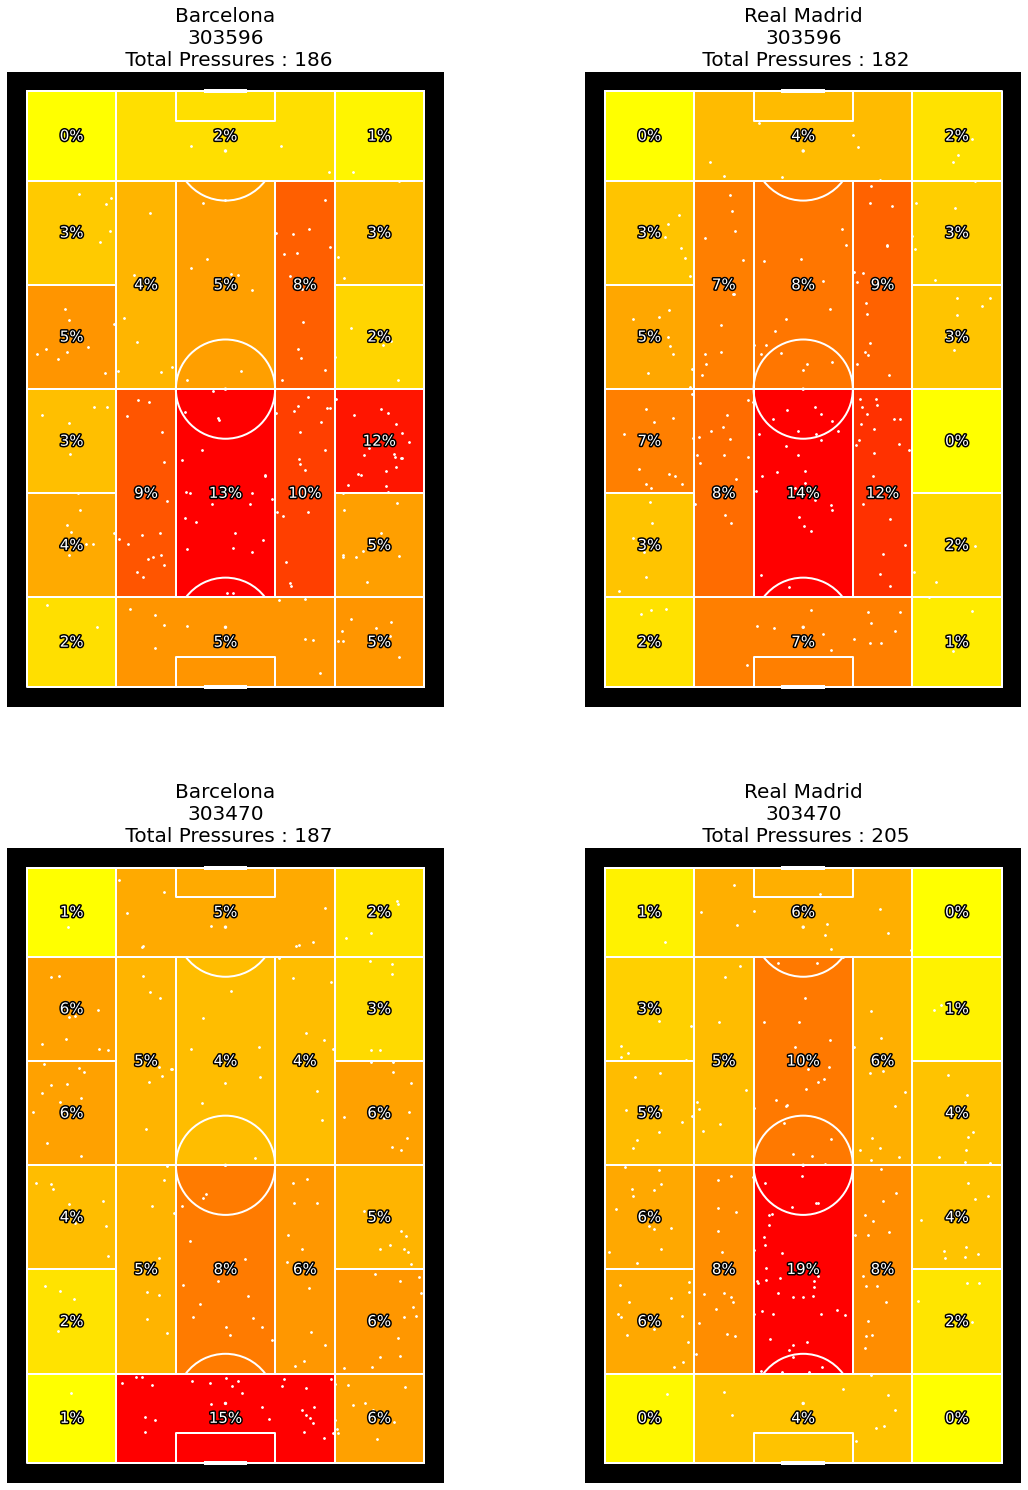

In [28]:
pitch = mplsoccer.VerticalPitch(pitch_color='black', line_color='white', line_zorder=2)
fig, axs = pitch.grid(nrows=2, ncols=2, axis=False,
                      figheight=20,
                      space=0.1, grid_height=0.98, grid_width=0.9,
                      title_height=0, endnote_height=0)

for idx,ax in enumerate(axs['pitch'].flat):
    teamData = ecPressData[(ecPressData['match_id'] == matchIDs[idx]) & (ecPressData['team.id'] == teamIDs[idx])]
    
    bin_statistic = pitch.bin_statistic_positional(teamData['startX'],teamData['startY'],
                                                   statistic='count',
                                                   positional='full',
                                                   normalize=True)

    pitch.heatmap_positional(bin_statistic,
                             ax=ax,
                             cmap='autumn_r',
                             edgecolor='white')

    pitch.scatter(teamData['startX'],teamData['startY'], c='white', s=3, ax=ax)

    labels = pitch.label_heatmap(bin_statistic, 
                                 color='white', fontsize=15,
                                 ax=ax, ha='center', va='center',
                                 str_format='{:.0%}', path_effects = path_eff)
    teamName = teamData['team.name'].unique().item()
    totPressures = len(teamData)
    ax.set_title(teamName + '\n' + str(matchIDs[idx]) +'\n Total Pressures : ' + str(totPressures), fontsize = 20)

# Passes Per Defensive Action (PPDA)

In [29]:
pressData.columns.values

array(['match_id', 'id', 'index', 'period', 'timestamp', 'minute',
       'second', 'possession', 'duration', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'related_events', 'off_camera', 'location',
       'player.id', 'player.name', 'position.id', 'position.name',
       'pass.recipient.id', 'pass.recipient.name', 'pass.length',
       'pass.angle', 'pass.height.id', 'pass.height.name',
       'pass.end_location', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'carry.end_location',
       'under_pressure', 'dribble.outcome.id', 'dribble.outcome.name',
       'dribble.nutmeg', 'duel.type.id', 'duel.type.name',
       'duel.outcome.id', 'duel.outcome.name', 'pass.outcome.id',
       'pass.outcome.name', 'ball_receipt.outcome.id',
       'ball_receipt.outcome.name', 'counterpress',
       'ball_recovery.

In [30]:
pressData[['team.id','home_team.home_team_id','away_team.away_team_id']]

team.id  home_team.home_team_id  away_team.away_team_id
39          206                     206                     217
86          206                     206                     217
96          206                     206                     217
97          206                     206                     217
103         206                     206                     217
...         ...                     ...                     ...
128964      322                     217                     322
128972      322                     217                     322
128984      322                     217                     322
129025      322                     217                     322
129033      322                     217                     322

[10667 rows x 3 columns]

In [31]:
eventsDataLaLiga2019['opponent_team.id'] = \
                    np.where(eventsDataLaLiga2019['team.id'] == eventsDataLaLiga2019['home_team.home_team_id'],
                             eventsDataLaLiga2019['away_team.away_team_id'],
                             eventsDataLaLiga2019['home_team.home_team_id'])

In [32]:
eventsDataLaLiga2019['opponent_team.name'] = \
                    np.where(eventsDataLaLiga2019['team.name'] == eventsDataLaLiga2019['home_team.home_team_name'],
                             eventsDataLaLiga2019['away_team.away_team_name'],
                             eventsDataLaLiga2019['home_team.home_team_name'])

In [33]:
pass_condition = eventsDataLaLiga2019['type.id'] == 30

In [34]:
oppHalf_condition = eventsDataLaLiga2019['startX'] < 60

In [35]:
eventsDataLaLiga2019[pass_condition & oppHalf_condition].groupby(['opponent_team.id']).agg({'opponent_team.name':'first',
                                                                                            'type.name':'count'})

opponent_team.name  type.name
opponent_team.id                              
205                         Leganés        705
206                Deportivo Alavés        713
207                        Valencia        274
209                      Celta Vigo        585
210                   Real Sociedad        568
212                 Atlético Madrid        613
213                         Sevilla        586
214                        Espanyol        660
215                 Athletic Bilbao        385
216                          Getafe        480
217                       Barcelona       6947
218                      Real Betis        399
220                     Real Madrid        674
221                         Levante        723
222                      Villarreal        702
322                           Eibar        824
422                         Osasuna        260
901                 Real Valladolid        646
1043                       Mallorca        628
1049                        Granada        764

In [36]:
oppData = eventsDataLaLiga2019[pass_condition & oppHalf_condition].groupby(['opponent_team.id']).agg({'opponent_team.name':'first',
                                                                                                      'type.name':'count'})

In [37]:
eventsDataLaLiga2019[['type.id','type.name']].drop_duplicates()

type.id          type.name
0           35        Starting XI
2           18         Half Start
4           30               Pass
5           42      Ball Receipt*
8           43              Carry
39          17           Pressure
42          14            Dribble
43           4               Duel
87          22     Foul Committed
88          21           Foul Won
108         39      Dribbled Past
113          2      Ball Recovery
117          3       Dispossessed
167         38         Miscontrol
181         16               Shot
182         23        Goal Keeper
183          9          Clearance
192          6              Block
427         10       Interception
1143        40    Injury Stoppage
1932        34           Half End
1936        19       Substitution
1988        36     Tactical Shift
1991        27         Player Off
2181        26          Player On
3642        41  Referee Ball-Drop
4239        33              50/50
9744        28             Shield
11345       24      Bad Behaviour
12156       37              Error
23814        8            Offside
35430       20   Own Goal Against
35431       25       Own Goal For

In [38]:
eventsDataLaLiga2019[eventsDataLaLiga2019['type.id'].isin([4,10,22])]

match_id                                    id  index  period  \
43        303421  8e2284e2-b47a-449b-b6bc-c224303b649c     44       1   
87        303421  f550a4e2-f2ad-4376-9abc-0cb1d46814ef     88       1   
118       303421  0f6715a8-7bd3-4330-a2fe-d14b290fd221    119       1   
184       303421  fc6c40cc-f1a0-45d8-b9d5-378aed34367c    185       1   
277       303421  6ae006ca-23d7-4bca-bb3d-63663162a277    278       1   
...          ...                                   ...    ...     ...   
128887    303731  02126917-ef13-45ee-a52e-5b468f4c0a62   3519       2   
128893    303731  72c7ddd9-89a2-4ce5-b9f3-ee0bb2325cd4   3525       2   
128934    303731  f2e62149-e02b-4794-884e-7896fa4ecb94   3566       2   
129037    303731  33ad1c80-e89a-478d-a873-dac73a60abdb   3669       2   
129054    303731  bbcfd05f-b1b3-4c8c-8164-131f66073442   3686       2   

       timestamp  minute  second  possession  duration  type.id  \
43       00:40.4       0      40           2  0.000000        4   
87       01:14.3       1      14           2  0.000000       22   
118      01:54.5       1      54           3  0.000000        4   
184      02:56.4       2      56           3  1.478976        4   
277      04:38.4       4      38           6  0.000000       22   
...          ...     ...     ...         ...       ...      ...   
128887   43:24.5      88      24         181  0.000000        4   
128893   43:29.2      88      29         181  0.000000       10   
128934   44:59.9      89      59         183  0.000000        4   
129037   46:43.2      91      43         184  0.000000        4   
129054   46:56.3      91      56         184  0.000000       10   

             type.name  possession_team.id possession_team.name  \
43                Duel                 217            Barcelona   
87      Foul Committed                 217            Barcelona   
118               Duel                 217            Barcelona   
184               Duel                 217            Barcelona   
277     Foul Committed                 206     Deportivo Alavés   
...                ...                 ...                  ...   
128887            Duel                 322                Eibar   
128893    Interception                 322                Eibar   
128934            Duel                 322                Eibar   
129037            Duel                 217            Barcelona   
129054    Interception                 217            Barcelona   

        play_pattern.id play_pattern.name  team.id         team.name  \
43                    9     From Kick Off      206  Deportivo Alavés   
87                    9     From Kick Off      206  Deportivo Alavés   
118                   3    From Free Kick      217         Barcelona   
184                   3    From Free Kick      217         Barcelona   
277                   1      Regular Play      217         Barcelona   
...                 ...               ...      ...               ...   
128887                9     From Kick Off      217         Barcelona   
128893                9     From Kick Off      322             Eibar   
128934                9     From Kick Off      217         Barcelona   
129037                1      Regular Play      322             Eibar   
129054                1      Regular Play      322             Eibar   

        tactics.formation tactics.lineup  \
43                    NaN            NaN   
87                    NaN            NaN   
118                   NaN            NaN   
184                   NaN            NaN   
277                   NaN            NaN   
...                   ...            ...   
128887                NaN            NaN   
128893                NaN            NaN   
128934                NaN            NaN   
129037                NaN            NaN   
129054                NaN            NaN   

                                  related_events off_camera      location  \
43      ['faeae230-ed70-4760-86de-a467eee4c586']  

In [39]:
defActs_condtion = eventsDataLaLiga2019['type.id'].isin([4,10,22])

In [40]:
oppHalf_defActs_condition = eventsDataLaLiga2019['startX'] > 60

In [41]:
eventsDataLaLiga2019[defActs_condtion & oppHalf_defActs_condition].groupby(['team.id'])['type.name'].count()

team.id
205      39
206      37
207      18
209      40
210      36
212      52
213      31
214      57
215      27
216      55
217     577
218      26
220      49
221      30
222      30
322      69
422      22
901      51
1043     29
1049     49
Name: type.name, dtype: int64

In [42]:
defActsData = eventsDataLaLiga2019[defActs_condtion & oppHalf_defActs_condition].groupby(['team.id'])['type.name'].count()

In [43]:
pd.concat([oppData,defActsData],axis=1)

opponent_team.name  type.name  type.name
205             Leganés        705         39
206    Deportivo Alavés        713         37
207            Valencia        274         18
209          Celta Vigo        585         40
210       Real Sociedad        568         36
212     Atlético Madrid        613         52
213             Sevilla        586         31
214            Espanyol        660         57
215     Athletic Bilbao        385         27
216              Getafe        480         55
217           Barcelona       6947        577
218          Real Betis        399         26
220         Real Madrid        674         49
221             Levante        723         30
222          Villarreal        702         30
322               Eibar        824         69
422             Osasuna        260         22
901     Real Valladolid        646         51
1043           Mallorca        628         29
1049            Granada        764         49

In [44]:
ppdaData = pd.concat([oppData,defActsData],axis=1)

In [45]:
ppdaData.columns = ['teamName','oppPasses','defActs']

In [46]:
ppdaData

teamName  oppPasses  defActs
205            Leganés        705       39
206   Deportivo Alavés        713       37
207           Valencia        274       18
209         Celta Vigo        585       40
210      Real Sociedad        568       36
212    Atlético Madrid        613       52
213            Sevilla        586       31
214           Espanyol        660       57
215    Athletic Bilbao        385       27
216             Getafe        480       55
217          Barcelona       6947      577
218         Real Betis        399       26
220        Real Madrid        674       49
221            Levante        723       30
222         Villarreal        702       30
322              Eibar        824       69
422            Osasuna        260       22
901    Real Valladolid        646       51
1043          Mallorca        628       29
1049           Granada        764       49

In [47]:
ppdaData['PPDA'] = ppdaData['oppPasses'].divide(ppdaData['defActs']).round(1)

In [48]:
ppdaData

teamName  oppPasses  defActs  PPDA
205            Leganés        705       39  18.1
206   Deportivo Alavés        713       37  19.3
207           Valencia        274       18  15.2
209         Celta Vigo        585       40  14.6
210      Real Sociedad        568       36  15.8
212    Atlético Madrid        613       52  11.8
213            Sevilla        586       31  18.9
214           Espanyol        660       57  11.6
215    Athletic Bilbao        385       27  14.3
216             Getafe        480       55   8.7
217          Barcelona       6947      577  12.0
218         Real Betis        399       26  15.3
220        Real Madrid        674       49  13.8
221            Levante        723       30  24.1
222         Villarreal        702       30  23.4
322              Eibar        824       69  11.9
422            Osasuna        260       22  11.8
901    Real Valladolid        646       51  12.7
1043          Mallorca        628       29  21.7
1049           Granada        764       49  15.6

In [49]:
px.bar(data_frame=ppdaData, x='teamName', y='PPDA')

## PPDA including Pressures

In [50]:
defActs_condtion = eventsDataLaLiga2019['type.id'].isin([4,10,17,22])

In [51]:
eventsDataLaLiga2019[defActs_condtion & oppHalf_defActs_condition].groupby(['team.id'])['type.name'].count()

team.id
205      182
206      140
207       65
209      167
210      204
212      173
213      152
214      211
215       96
216      212
217     2827
218      100
220      212
221      207
222      168
322      255
422       67
901      180
1043     154
1049     250
Name: type.name, dtype: int64

In [52]:
defActswPData = eventsDataLaLiga2019[defActs_condtion & oppHalf_defActs_condition].groupby(['team.id'])['type.name'].count()

In [53]:
PPDAwP_Data = pd.concat([oppData,defActswPData],axis=1)

In [54]:
PPDAwP_Data.columns = ['teamName','oppPasses','defActswP']

In [55]:
PPDAwP_Data['PPDAwP'] = PPDAwP_Data['oppPasses'].divide(PPDAwP_Data['defActswP']).round(1)

In [56]:
ppdaData = pd.concat([ppdaData,defActswPData],axis=1)

In [57]:
ppdaData.rename(columns={'type.name':'defActswP'},inplace=True)

In [58]:
ppdaData['PPDAwP'] = ppdaData['oppPasses'].divide(ppdaData['defActswP']).round(1)

In [59]:
ppdaData.style.bar(subset=['PPDA','PPDAwP']).set_precision(1)